<a href="https://colab.research.google.com/github/dwonn201/KaggleStudy/blob/master/Used%20Cars%20Dataset/Craiglist%EC%A4%91%EA%B3%A0_%EC%9E%90%EB%8F%99%EC%B0%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Craiglist중고 자동차 데이터 분석
    
- 데이터 출처: https://www.kaggle.com/austinreese/craigslist-carstrucks-data


----------

## 데이터 소개
    - Kaggle 내 Used Cars Dataset을 사용합니다.
    - Craigslist라는 세계 최대 중고차 거래 사이트에서 자동으로 scrapping되어 정기적으로 적재되어 있습니다.
    - 각 컬럼 정보는 아래와 같습니다.

---------

    - vehicles.csv
    id : 중고차 거래의 아이디 (entry ID)
    url : 중고차 거래 페이지 (listing URL)
    region : 해당 거래의 관리 지점 (craigslist region)
    region_url : 거래 관리 지점의 홈페이지 (region URL)
    price : 자동차 거래가 (entry price)
    year : 자동차 생산년도 (entry year)
    manufacturer : 자동차 제조사 (manufacturer of vehicle)
    model : 자동차 모델명 (model of vehicle)
    condition : 자동차 상태 (condition of vehicle)
    cylinders : 자동차 기통 수 (number of cylinders)
    fuel : 자동차 연료 타입 (fuel type)
    odometer : 자동차 운행 마일 수 (miles traveled by vehicle)
    title_status : 자동차 타이틀 상태 (소유주 등록 상태) (title status of vehicle)
    transmission : 자동차 트랜스미션 종류 (transmission of vehicle)
    vin : 자동차 식별 번호 (vehicle identification number)
    drive : 자동차 구동 타입 (type of drive)
    size : 자동차 크기 (size of vehicle)
    type : 자동차 일반 타입 ex. 세단, suv, ... (generic type of vehicle) 
    paint_color : 자동차 색상 (color of vehicle)
    image_url : 자동차 이미지 url (image URL)
    description : 세부 설명 (listed description of vehicle)
    county : 실수로 생성된 미사용 컬럼 (useless column left in by mistake)
    state : 거래가 등록된 미 주 (state of listing)
    lat : 거래가 등록된 곳의 위도 (latitude of listing)
    long : 거래가 등록된 곳의 경도 (longitude of listing)
    posting_date : 거래가 포스팅된 일자 (posting_date)
    


## Step 1. 데이터셋 준비하기

### 1. Colab Notebook에 Kaggle API 세팅하기


In [1]:
import os

# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'ohdddd'
os.environ['KAGGLE_KEY'] = '8a2de9199434478aa623b471d01994e2'


### 2. 데이터 다운로드 및 압축 해제하기

In [2]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!rm *.*
!kaggle datasets download -d austinreese/craigslist-carstrucks-data
!unzip '*.zip'

 99% 261M/262M [00:02<00:00, 135MB/s]
100% 262M/262M [00:02<00:00, 112MB/s]
Archive:  craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


### 3. Pandas 라이브러리로 csv파일 읽어들이기


In [3]:
import pandas as pd
import numpy as np

In [4]:
 df = pd.read_csv('vehicles.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


### 4. 불필요한 데이터 데이터프레임에서 제거하기


In [5]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
# 데이터프레임에서 불필요한 컬럼 제거하기
# 'year' 컬럼을 'age'컬럼으로 변경하여 사용
print(df.shape)
df.head()

(426880, 26)


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [7]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [8]:
# Price의 경우 null값이 0으로 들어갔을 수 있음. outlier확인 필요가 있음
# year가 1900인경우 이상치
# odometer 역시 null값이 0으로 들어간것으로 추정.
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [9]:
data = df.copy()

In [10]:
print(data.shape)
data.head()

(426880, 26)


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [11]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [12]:
# 불필요컬럼 제거
unneccessary_columns = ['id',             # 중고차 거래의 아이디 (entry ID)
                        'url',            # 중고차 거래 페이지 (listing URL)
                        #'region',        # 해당 거래의 관리 지점 (craigslist region)
                        'region_url',     # 거래 관리 지점의 홈페이지 (region URL)
                        #'price',         # 자동차 가격 (entry price)
                        #'year',          # 자동차 생산년도 (entry year)
                        #'manufacturer',  # 자동차 제조사 (manufacturer of vehicle)
                        #'model',         # 자동차 모델명 (model of vehicle)
                        #'condition',     # 자동차 상태 (condition of vehicle)
                        #'cylinders',     # 자동차 기통 수 (number of cylinders)
                        #'fuel',          # 자동차 연료 타입 (fuel type)
                        #'odometer',      # 자동차 운행 마일 수 (miles traveled by vehicle)
                        #'title_status',  # 자동차 타이틀 상태 (소유주 등록 상태) (title status of vehicle)
                        #'transmission',  # 자동차 트랜스미션 종류 (transmission of vehicle)
                        'VIN',            # 자동차 식별 번호 (vehicle identification number)
                        #'drive',         # 자동차 구동 타입 (type of drive)
                        #'size',          # 자동차 크기 (size of vehicle)
                        #'type',          # 자동차 일반 타입 ex. 세단, suv, pickup, 등 ... (generic type of vehicle) 
                        #'paint_color',   # 자동차 색상 (color of vehicle)
                        'image_url',      # 자동차 이미지 url (image URL)
                        'description',    # 자동차 세부 설명 (listed description of vehicle) -> 추후 자연어 처리를 통해 변수로 사용할 수 있을것 같음
                        'county',         # 실수로 생성된 미사용 컬럼 (useless column left in by mistake)
                        'state',          # 거래가 등록된 주 (state of listing)
                        'lat',            # 거래가 등록된 위치의 위도 (latitude of listing)
                        'long',           # 거래가 등록된 위치의 경도 (longitude of listing)
                        'posting_date'    # 거래가 포스팅된 일자 (posting_date)
                        ]

In [13]:
data.drop(unneccessary_columns, axis = 1, inplace = True)

In [14]:
# 자동차 생산 후 기간 컬럼 생성
# 자동차 생산년도 정도가 있으므로 현재년도 - 생산년도 = 자동차 생산 후 기간 생성
data['age'] = 2022 - data['year']
data.drop(['year'], axis = 1, inplace = True)

In [15]:
print(data.shape)
data.head()

(426880, 15)


,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,age
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5. 범주형 데이터의 통계 분석하기


In [16]:
data.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

In [17]:
print("num of model :", len(data['manufacturer'].value_counts()))
data['manufacturer'].value_counts()

num of model : 42


ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


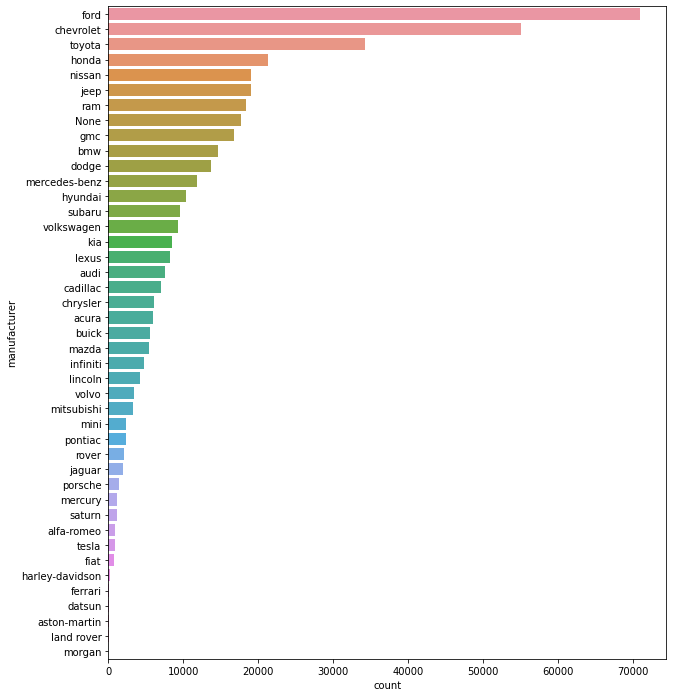

In [18]:
# 분포확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,12))
sns.countplot(y = 'manufacturer', data = data.fillna('None'), order = data.fillna('None')['manufacturer'].value_counts().index)

n/a 와 수가 적은 소수 카테고리들은 기타로 묶어줄 필요가 있어보임

In [19]:
print("num of model :", len(data['model'].value_counts()))
data['model'].value_counts()

num of model : 29667


f-150                       8009
silverado 1500              5140
1500                        4211
camry                       3135
silverado                   3023
                            ... 
Huyndai Sante Fe Limited       1
astro awd 4x4                  1
escalade and                   1
cx 3                           1
Paige Glenbrook Touring        1
Name: model, Length: 29667, dtype: int64

차량 모델 수도 많고 개인이 임의로 작성했기 때문에 같은 모델이더라도 다르게 기입됐을 수 있음.  
때문에 1건만 등록된 차량 모델도 다수 존재.
정제 필요

In [20]:
print("num of condition :", len(data.fillna('none')['condition'].value_counts()))
data.fillna('none')['condition'].value_counts()

num of condition : 7


none         174104
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

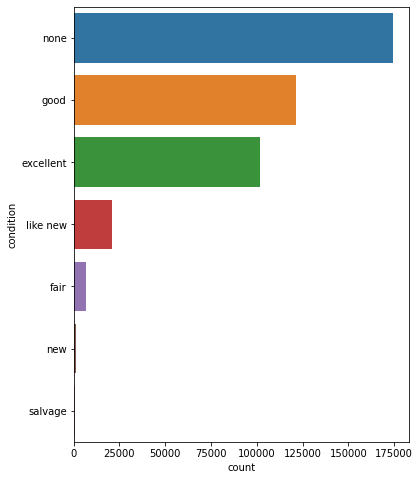

In [21]:
plt.figure(figsize = (6,8))
sns.countplot(y = 'condition', data = data.fillna('none'), order = data.fillna('none')['condition'].value_counts().index)

none 값이 다수 존재

In [22]:
print("num of cylinders :", len(data.fillna('None')['cylinders'].value_counts()))
data.fillna('None')['cylinders'].value_counts()

num of cylinders : 9


None            177678
6 cylinders      94169
4 cylinders      77642
8 cylinders      72062
5 cylinders       1712
10 cylinders      1455
other             1298
3 cylinders        655
12 cylinders       209
Name: cylinders, dtype: int64

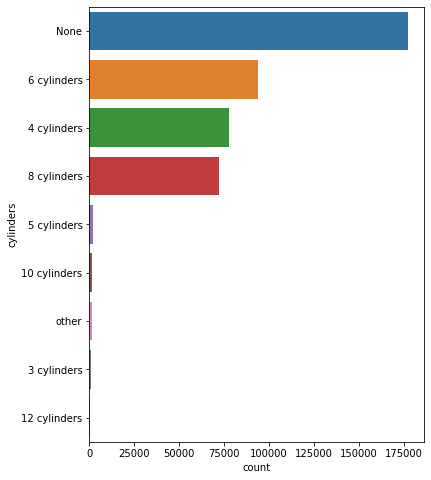

In [23]:
plt.figure(figsize = (6,8))
sns.countplot(y = 'cylinders', data = data.fillna('None'), order = data.fillna('None')['cylinders'].value_counts().index)

In [24]:
print("num of fuel :", len(data.fillna('None')['fuel'].value_counts()))
data.fillna('None')['fuel'].value_counts()

num of fuel : 6


gas         356209
other        30728
diesel       30062
hybrid        5170
None          3013
electric      1698
Name: fuel, dtype: int64

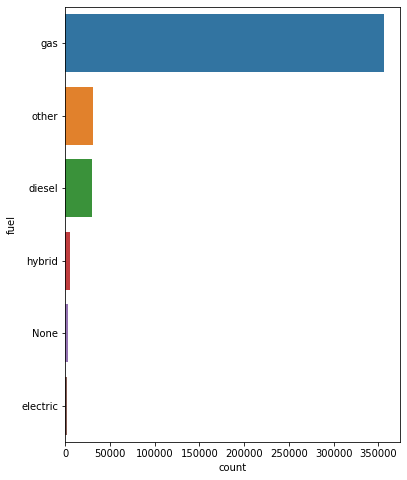

In [25]:
plt.figure(figsize = (6,8))
sns.countplot(y = 'fuel', data = data.fillna('None'), order = data.fillna('None')['fuel'].value_counts().index)

대부분 gas차

In [26]:
print("num of transmission :", len(data.fillna('None')['transmission'].value_counts()))
data.fillna('None')['transmission'].value_counts()

num of transmission : 4


automatic    336524
other         62682
manual        25118
None           2556
Name: transmission, dtype: int64

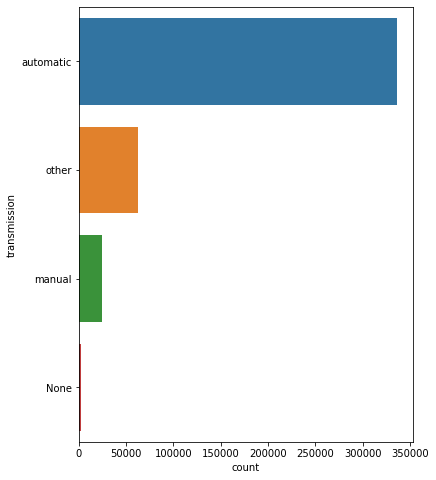

In [27]:
plt.figure(figsize = (6,8))
sns.countplot(y = 'transmission', data = data.fillna('None'), order = data.fillna('None')['transmission'].value_counts().index)

In [28]:
print("num of drive :", len(data.fillna('None')['drive'].value_counts()))
data.fillna('None')['drive'].value_counts()

num of drive : 4


4wd     131904
None    130567
fwd     105517
rwd      58892
Name: drive, dtype: int64

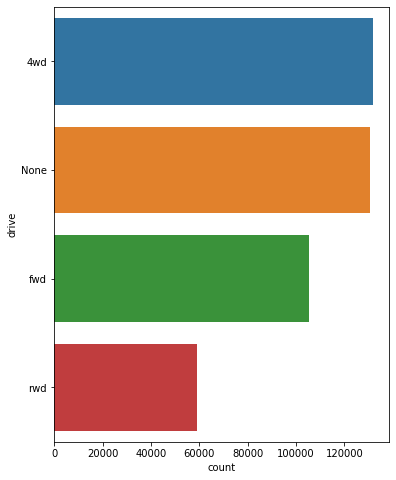

In [29]:
plt.figure(figsize = (6,8))
sns.countplot(y = 'drive', data = data.fillna('None'), order = data.fillna('None')['drive'].value_counts().index)

In [30]:
print("num of size :", len(data.fillna('None')['size'].value_counts()))
data.fillna('None')['size'].value_counts()

num of size : 5


None           306361
full-size       63465
mid-size        34476
compact         19384
sub-compact      3194
Name: size, dtype: int64

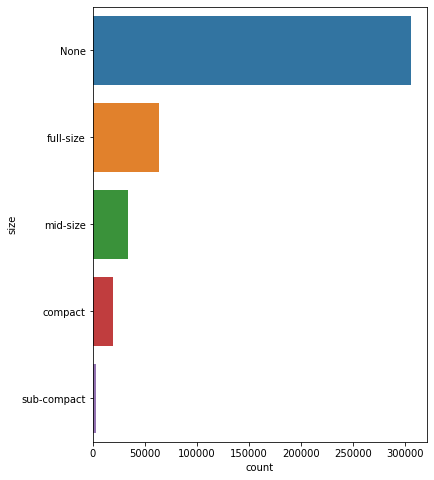

In [31]:
plt.figure(figsize = (6,8))
sns.countplot(y = 'size', data = data.fillna('None'), order = data.fillna('None')['size'].value_counts().index)

In [32]:
print("num of type :", len(data.fillna('None')['type'].value_counts()))
data.fillna('None')['type'].value_counts()

num of type : 14


None           92858
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: type, dtype: int64

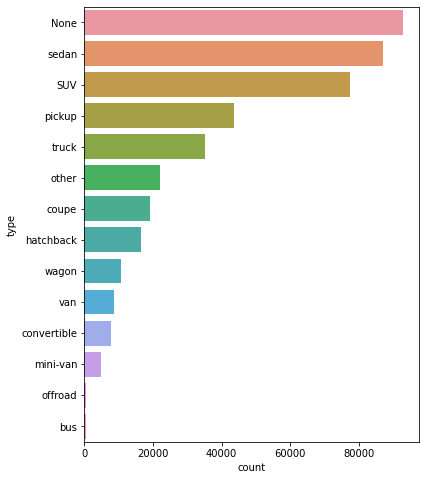

In [33]:
plt.figure(figsize = (6,8))
sns.countplot(y = 'type', data = data.fillna('None'), order = data.fillna('None')['type'].value_counts().index)

In [34]:
print("num of paint_color :", len(data.fillna('None')['paint_color'].value_counts()))
data.fillna('None')['paint_color'].value_counts()

num of paint_color : 13


None      130203
white      79285
black      62861
silver     42970
blue       31223
red        30473
grey       24416
green       7343
custom      6700
brown       6593
yellow      2142
orange      1984
purple       687
Name: paint_color, dtype: int64

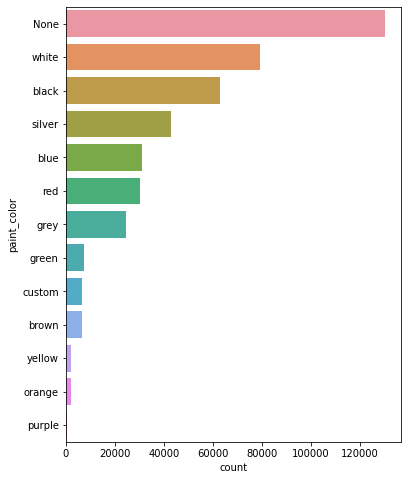

In [35]:
plt.figure(figsize = (6,8))
sns.countplot(y = 'paint_color', data = data.fillna('None'), order = data.fillna('None')['paint_color'].value_counts().index)

### 6. 수치형 데이터의 통계 분석하기

In [36]:
data.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

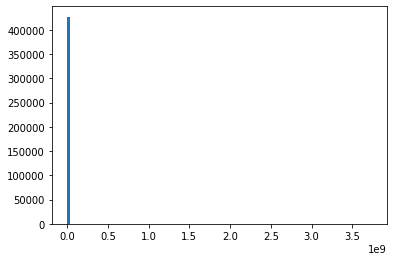

In [40]:
# sns.histplot(x='price', data = data) 
plt.hist(data['price'],
         bins = 100,
         )
plt.show()

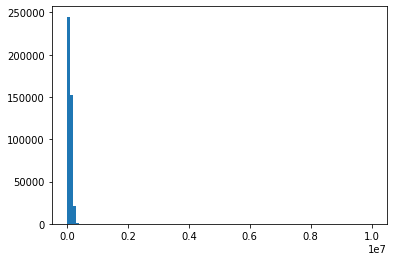

In [42]:
plt.hist(data['odometer'],
         bins = 100,
         )
plt.show()

price와 odometer 모두 outlier가 존재하며 한쪽에 몰려있음.

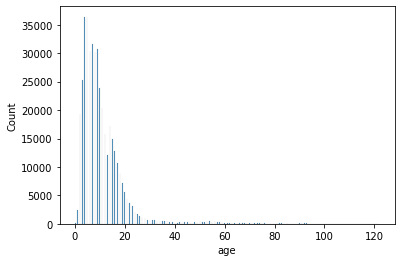

In [44]:
sns.histplot(x='age', data = data)

## Step 3. 데이터 클리닝 수행하기